# 1 引言
对MIT公开课《信号与系统：模拟与数字处理》进行笔记，并用简单的python代码来展现。

# 2 信号
## 2.1 余弦信号
### 2.1.1 连续时间
\begin{equation}
x(t)=A\cos(\omega_0t+\phi)
\end{equation}
- 连续的$\cos$信号，是周期函数，其周期为$T_0=\frac{2\pi}{\omega_0}$
- 时移$\Leftrightarrow$相变,时间变化$t_0$相当于相位变化$\omega_0t_0$
\begin{equation}
A\cos[\omega_0(t+t_0)]=A\cos[\omega_0t+\omega_0t_0]
\end{equation}

### 2.1.2 离散时间
\begin{equation}
x[n]=A\cos(\Omega_0n+\phi)
\end{equation}
- 离散的$\cos$信号，并不一定是周期函数，当且仅当$\Omega_0=\frac{2\pi m}{N}$时，是周期函数，并且周期与连续信号的含义并不相同了
- 对于连续信号来说，不同的$\omega_0$表示完全不同的信号；但是离散信号中，相差$2\pi$的$\Omega_0$，代表相同的信号
\begin{align}
x_1[n] &= A\cos[\Omega_1n+\phi] \\
x_2[n] &= A\cos[\Omega_2n+\phi]
\end{align}
若$\Omega_2=\Omega_1+2\pi m$,则有$x_2[n]=A\cos[\Omega_1n+2\pi mn+\phi]$,因为mn为整数，所以两者为同一信号

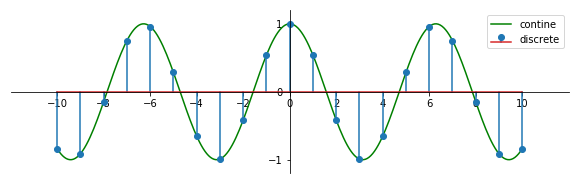

In [69]:
import numpy as np
from pylab import *
# a simple function to set the plot
def set_plot(xr, yr):  
    dx = (xr[1] - xr[0]) * 0.1
    dy = (yr[1] - yr[0]) * 0.1
    xlim(xr[0] - dx,xr[1] + dx)
    ylim(yr[0] - dy, yr[1] + dy)
    yticks(np.linspace(yr[0], yr[1], yr[2], endpoint=True))
    xticks(np.linspace(xr[0], xr[1], xr[2], endpoint=True))
    ax = gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    legend(loc='upper right')

def cos_signal():
    figure(figsize=(10,3))
    # with omega = 1, and phi = 0, the cos looks like
    omega = 1
    X = np.linspace(-10, 10, 256, endpoint=True)
    Y = np.cos(X * omega)
    Xn = np.asarray([d for d in range(-10, 11)])
    Yn = np.cos(Xn * omega)
    plot(X, Y, color="green", label='contine')
    stem(Xn, Yn, label='discrete')
    set_plot(xr=(-10, 10, 11), yr=(-1, 1, 3))
    show()
cos_signal()

## 2.2 复指数信号
### 2.2.1 连续时间
\begin{equation}
x(t)=Ce^{at} \\
C=\vert C\vert e^{j\theta} \\
a=r+j\omega_0 \\
x(t)=|C|e^{j\theta}e^{(r+j\omega_0)t}
=|C|e^{rt}e^{j(\omega_0t+\theta)}
\end{equation}
由于
$$
\cos(\omega_0t+\theta)+jsin(\omega_0t+\theta)=e^{j(\omega_0t+\theta)}
$$
所以
$$
x(t)=|C|e^{rt}\cos(\omega_0t+\theta)+j|C|e^{rt}\sin(\omega_0t+\theta)
$$
### 2.2.2 离散时间
\begin{equation}
x[n]=C\alpha^n \\
C=|C|e^{j\theta} \\
\alpha=|\alpha|e^{j\Omega_0} \\
x[n]=|C|e^{j\theta}(|\alpha|e^{j\Omega_0})^n=|C||\alpha|^ne^{j(\Omega_0n+\theta)}
\end{equation}
同样使用欧拉公式得到
$$
x[n]=|C||\alpha|^n\cos(\Omega_0n+\theta)+j|C||\alpha|^nsin(\Omega_0n+\theta)
$$

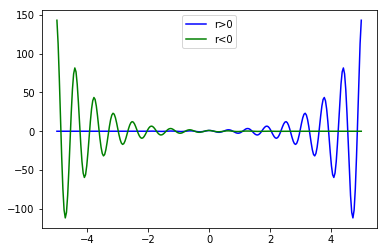

In [70]:
def exp_signal():
    t = np.linspace(-5, 5, 256, endpoint=True)
    xt0 = np.exp(t) * np.cos(10 * t)
    xt1 = np.exp(-t) * np.cos(10 * t)
    plot(t, xt0, color="blue", label="r>0")
    plot(t, xt1, color="green", label="r<0")
    legend(loc="upper center")
    show()
exp_signal()

## 2.3 阶跃与脉冲信号
### 2.3.1 离散表达方式
单位阶跃信号
\begin{equation}
u[n]=\begin{cases}
0&\text{n<0}\\
1&\text{n$\geq$0}
\end{cases}
\end{equation}
单位脉冲信号
\begin{equation}
\delta[n]=\begin{cases}
0&\text{n$\neq$0}\\
1&\text{n=0}
\end{cases}
\end{equation}

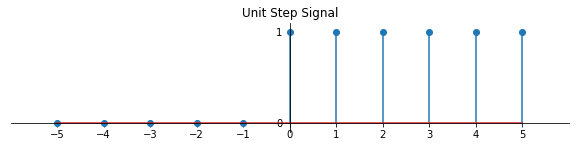

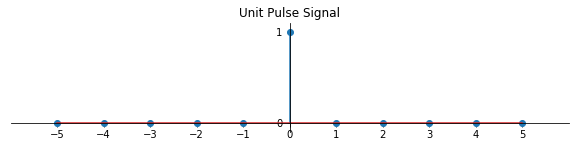

In [71]:
def unit_step():
    figure(figsize=(10,2))
    n = np.asarray([d for d in range(-5, 6)])
    u = np.asarray([(d >= 0) for d in range(-5, 6)])
    stem(n, u)
    set_plot(xr=(-5, 5, 11), yr=(0, 1, 2))
    title('Unit Step Signal')
    show()
def unit_pulse():
    figure(figsize=(10,2))
    n = np.asarray([d for d in range(-5, 6)])
    u = np.asarray([(d == 0) for d in range(-5, 6)])
    stem(n, u)
    set_plot(xr=(-5, 5, 11), yr=(0, 1, 2))
    title('Unit Pulse Signal')
    show()
unit_step()
unit_pulse()

- 由阶跃信号得到脉冲信号
    $\delta[n]=u[n]-u[n-1]$
- 由脉冲信号得到阶跃信号
    1. $u[n]=\sum_{m=-\infty}^n\delta[m]$
    2. $u[n]=\sum_{k=0}^\infty\delta[n-k]$

### 2.3.2 连续表达
单位阶跃信号
\begin{equation}
u(t)=\begin{cases}
0&\text{t<0}\\
1&\text{t>0}
\end{cases}
\end{equation}
在0点处无定义，也就是说并不连续，为了能够可导，转换成另一个函数的极限表达方式：
\begin{equation}
u_\Delta(t)=\begin{cases}
0&\text{t<0}\\
1&\text{t>$\Delta$} \\
linear&\text{0$\leq$ t$\leq\Delta$}
\end{cases}
\end{equation}
则可以表示$$u(t)=u_\Delta(t), \Delta\rightarrow0$$
单位脉冲信号
\begin{equation}
\delta_\Delta(t)=\frac{du_\Delta(t)}{dt} \\
\delta(t)=\delta_\Delta(t),\Delta\rightarrow 0
\end{equation}

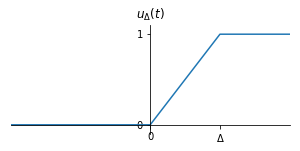

In [92]:
def unit_step_delta():
    figure(figsize=(5,2))
    t = np.asarray([-1, 0, 0.3, 1])
    udt = np.asarray([0, 0, 1, 1])
    plot(t, udt)
    set_plot(xr=(-0.5, 0.5, 0), yr=(0, 1, 2))
    xticks(np.asarray([0, 0.3]), ['0', '$\Delta$'])
    title('$u_\Delta(t)$')
    show()
unit_step_delta()

- 阶跃得到脉冲
    $\delta(t)=\frac{du(t)}{dt}$
- 脉冲得到阶跃
    $u(t)=\int_{-\infty}^t\delta(\tau)d\tau$

## 2.4 性质
- Causality因果性
- Stability稳定性
- Time invariance时不变
- Linearity线性

# 3 卷积
## 3.1 离散
$$
x[n]=\sum_{k=-\infty}^\infty x[k]\delta[n-k]
$$
- 这是一个线性系统，且对于脉冲$\delta[n-k]$的响应为$h_k[n]$，则以x[n]为输入，整个系统的响应输出为
$$
y[n]=\sum_{k=-\infty}^\infty x[k]h_k[n]
$$
- 由于脉冲信号的时不变性，我们可以得知$h_k[n]=h_0[n-k]$,简写为$h[n-k]$

则整个时不变线性系统(LTI)，X为输入信号，Y为输出信号，卷积结果为：
$$
Y[n]=\sum_{k=-\infty}^\infty X[k]h[n-k]
$$

## 3.2 连续
$$
x(t)=\int_{k=-\infty}^\infty x(\tau)\delta(t-\tau)d\tau
$$
经过与离散相似的变换，最终得到LTI，X为输入信号，Y为输出信号，卷积结果为：
$$
Y(t)=\int_{k=-\infty}^\infty X(\tau)h(t-\tau)d\tau
$$

## 3.3 图示
以离散的情况为例，用一个图示过程，表现卷积

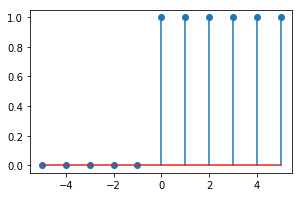

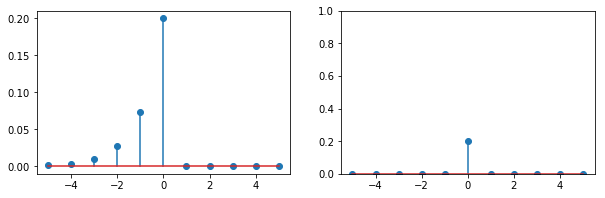

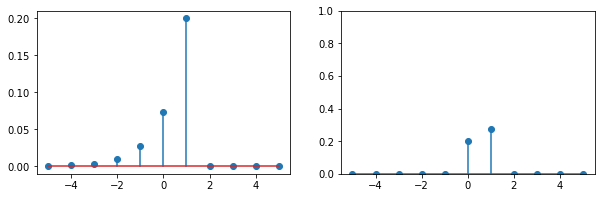

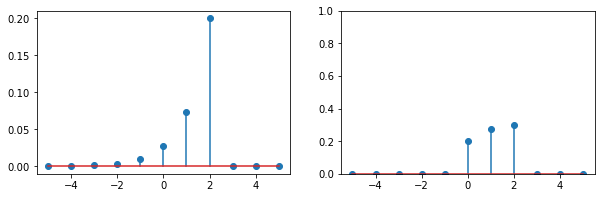

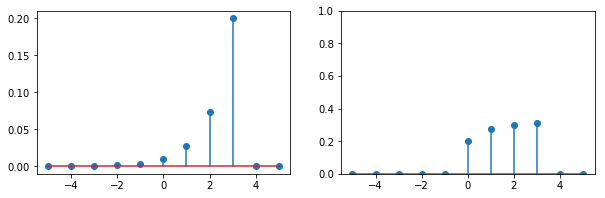

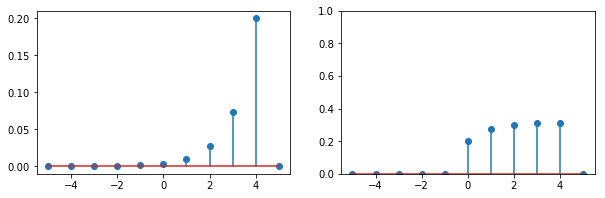

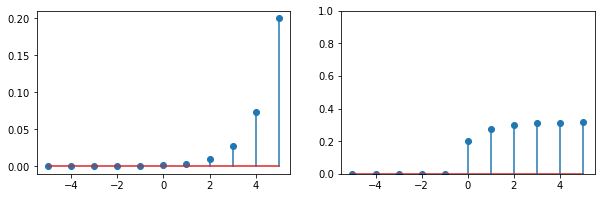

In [189]:
def conv1d():
    figure(figsize=(4.7,3))
    n = np.asarray([d for d in range(-5, 6)])
    x = np.asarray([int(d >= 0) for d in range(-5, 6)])
    stem(n, x)
    y = [0] * 11
    base = -5
    for t in range(base, 6):
        if t < 0:
            continue
        figure(figsize=(10,3))
        h = np.asarray([(d >= 0) * 0.2 * np.exp(-d) for d in range(-5, 6)])
        hnt = np.asarray([((t-d) >= 0) * 0.2 * np.exp(-t+d) for d in range(-5, 6)])
        for k in range(t - base + 1):
            y[t - base] += x[k] * hnt[k]
        hplt = subplot(121)
        hplt.stem(n, hnt)
        yplt = subplot(122)
        ylim(0, 1)
        yplt.stem(n, np.asarray(y))
        show()
conv1d()